In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("../data/raw/BMW_Sales_2010-2024.csv")

### Step 1: Data Overview

In [17]:
df.shape

(50000, 11)

In [18]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [19]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


### Step 2: Check the Data

#### 2.1 Checking missing valus

In [21]:
df.isna().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

No missing values

#### 2.2 Checking duplicated

In [22]:
df.loc[df.duplicated()]

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification


No duplicated

### Step 3: Data Exploration

#### 3.1 Explore numerical variables


 Year value_counts
Year
2022    3478
2024    3427
2019    3392
2021    3372
2016    3365
2015    3358
2014    3350
2012    3332
2010    3330
2013    3326
2017    3290
2018    3278
2011    3278
2023    3219
2020    3205
Name: count, dtype: int64


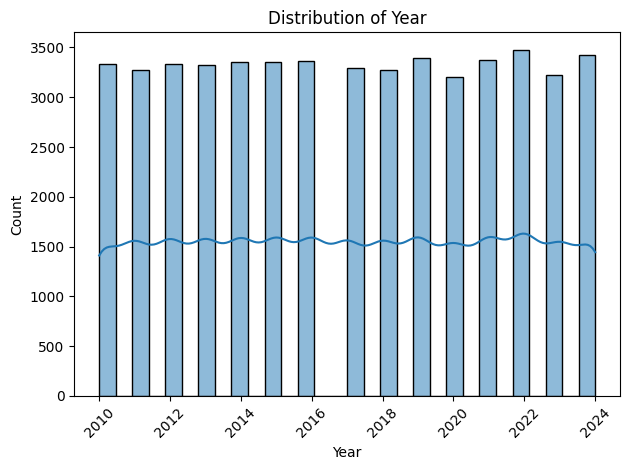


 Engine_Size_L value_counts
Engine_Size_L
3.8    1511
2.5    1486
4.5    1475
1.9    1471
2.6    1470
4.2    1468
2.7    1452
4.4    1452
3.5    1450
2.1    1448
4.7    1442
3.7    1437
2.3    1436
1.6    1432
3.1    1431
3.2    1426
2.9    1425
3.9    1425
4.3    1424
3.3    1423
1.8    1422
4.1    1421
3.0    1420
3.4    1419
1.7    1418
4.0    1418
2.0    1417
2.2    1406
4.6    1405
4.8    1391
2.4    1381
3.6    1381
2.8    1370
4.9    1314
5.0     723
1.5     710
Name: count, dtype: int64


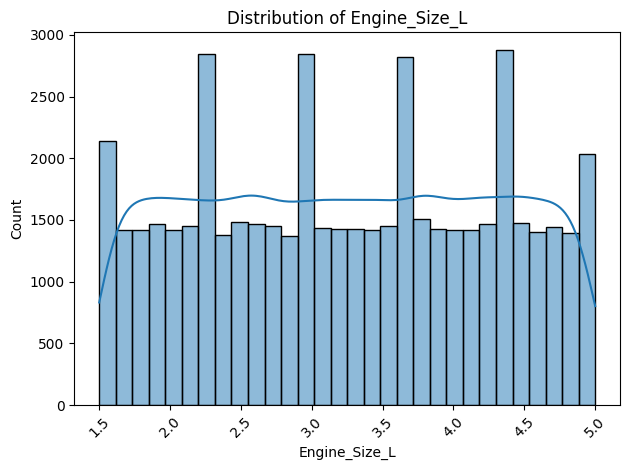


 Mileage_KM value_counts
Mileage_KM
136842    5
14113     4
175287    4
132490    4
162249    4
         ..
56672     1
151030    1
147396    1
3379      1
27255     1
Name: count, Length: 44347, dtype: int64


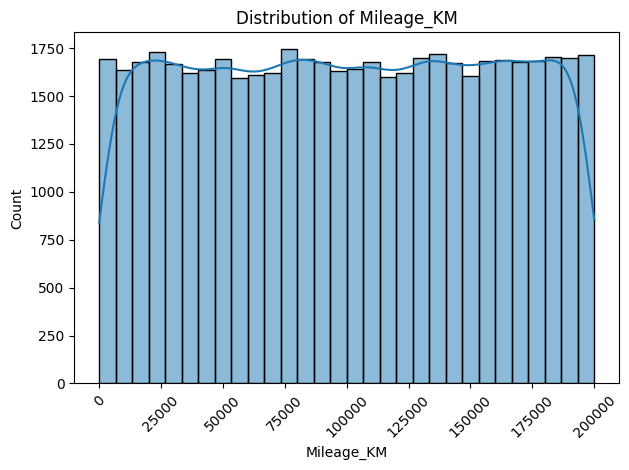


 Price_USD value_counts
Price_USD
30948     6
109241    5
67539     5
99091     5
64270     5
         ..
102778    1
55064     1
42926     1
49898     1
60971     1
Name: count, Length: 38246, dtype: int64


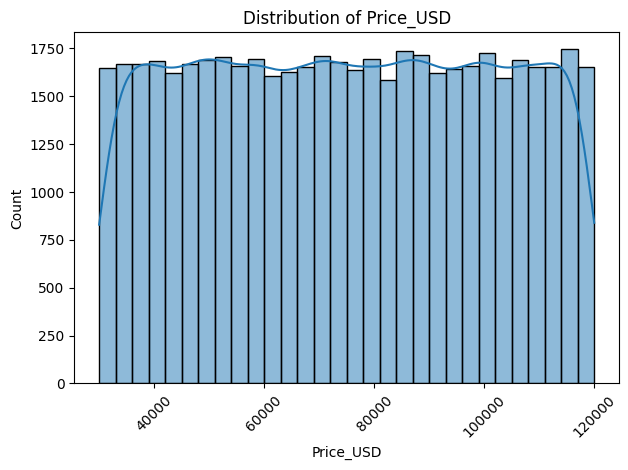


 Sales_Volume value_counts
Sales_Volume
9502    16
1474    14
6867    14
6976    14
7867    13
        ..
1282     1
761      1
9411     1
5463     1
9083     1
Name: count, Length: 9845, dtype: int64


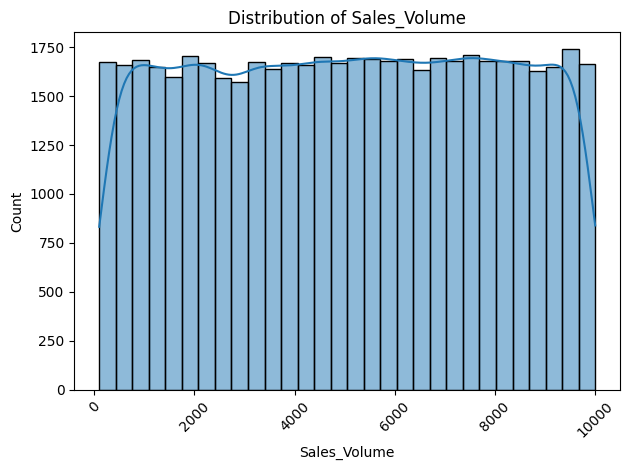

In [23]:
numerical_cols=df.select_dtypes(include='number').columns

for col in numerical_cols:
    print(f"\n {col} value_counts")
    print(df[col].value_counts())
    sns.histplot(x=col ,data=df, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### 3.2 Explore categorical features


 Model value_counts
Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4804\2497964907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


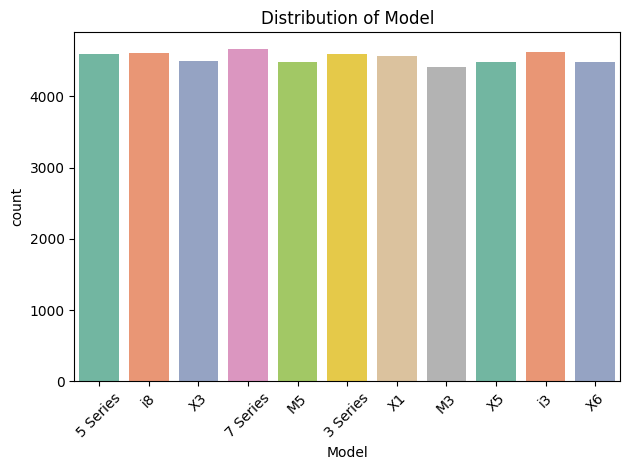


 Region value_counts
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4804\2497964907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


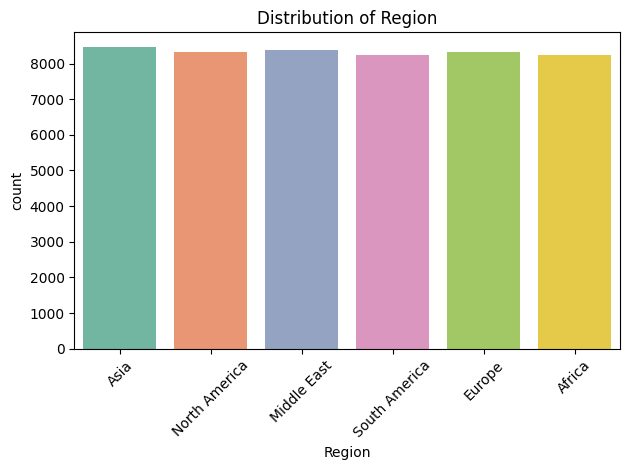


 Color value_counts
Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4804\2497964907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


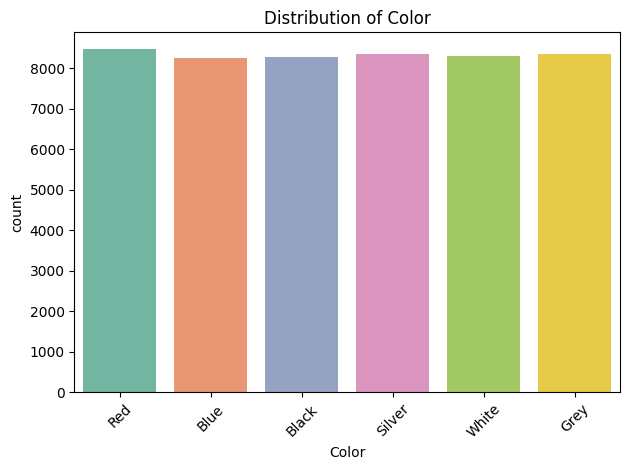


 Fuel_Type value_counts
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4804\2497964907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


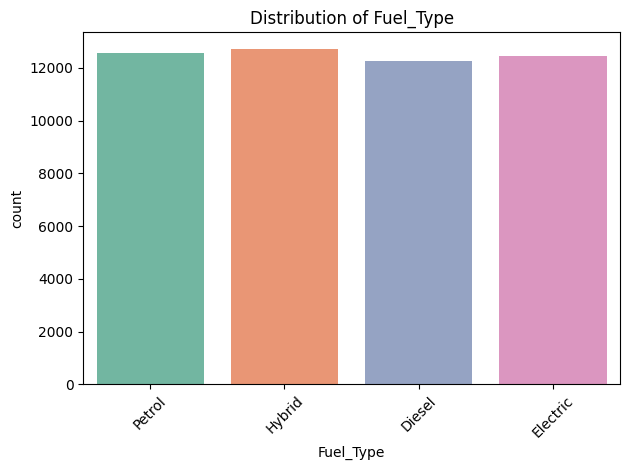


 Transmission value_counts
Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4804\2497964907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


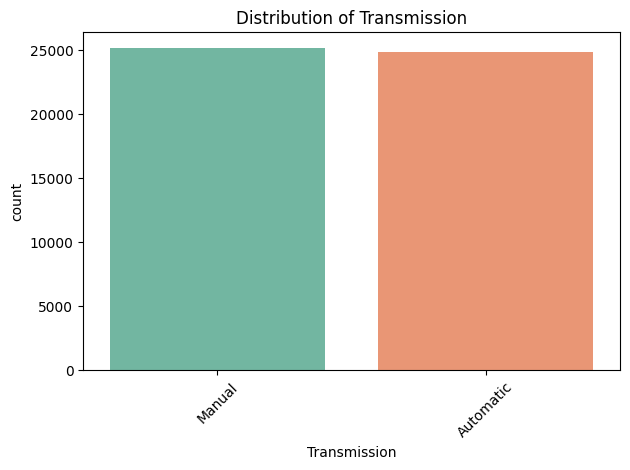


 Sales_Classification value_counts
Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4804\2497964907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


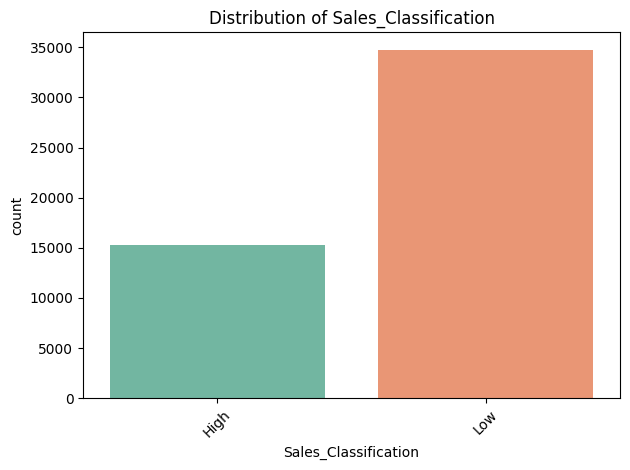

In [24]:
categorical_cols=df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n {col} value_counts")
    print(df[col].value_counts())
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Step 4: Feature Relationships

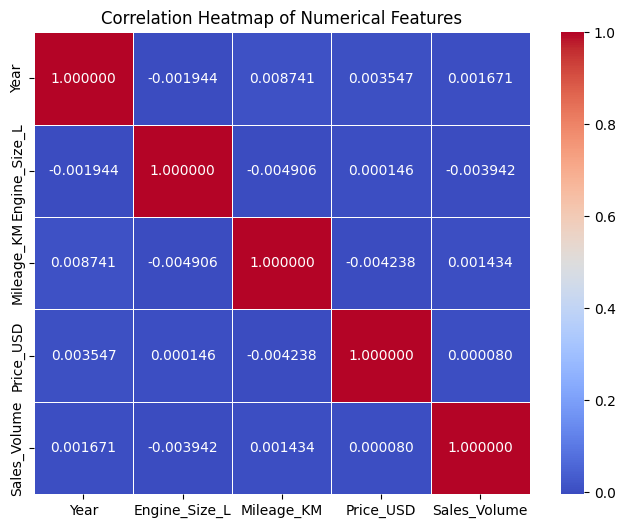

In [25]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

There is very weak correlation

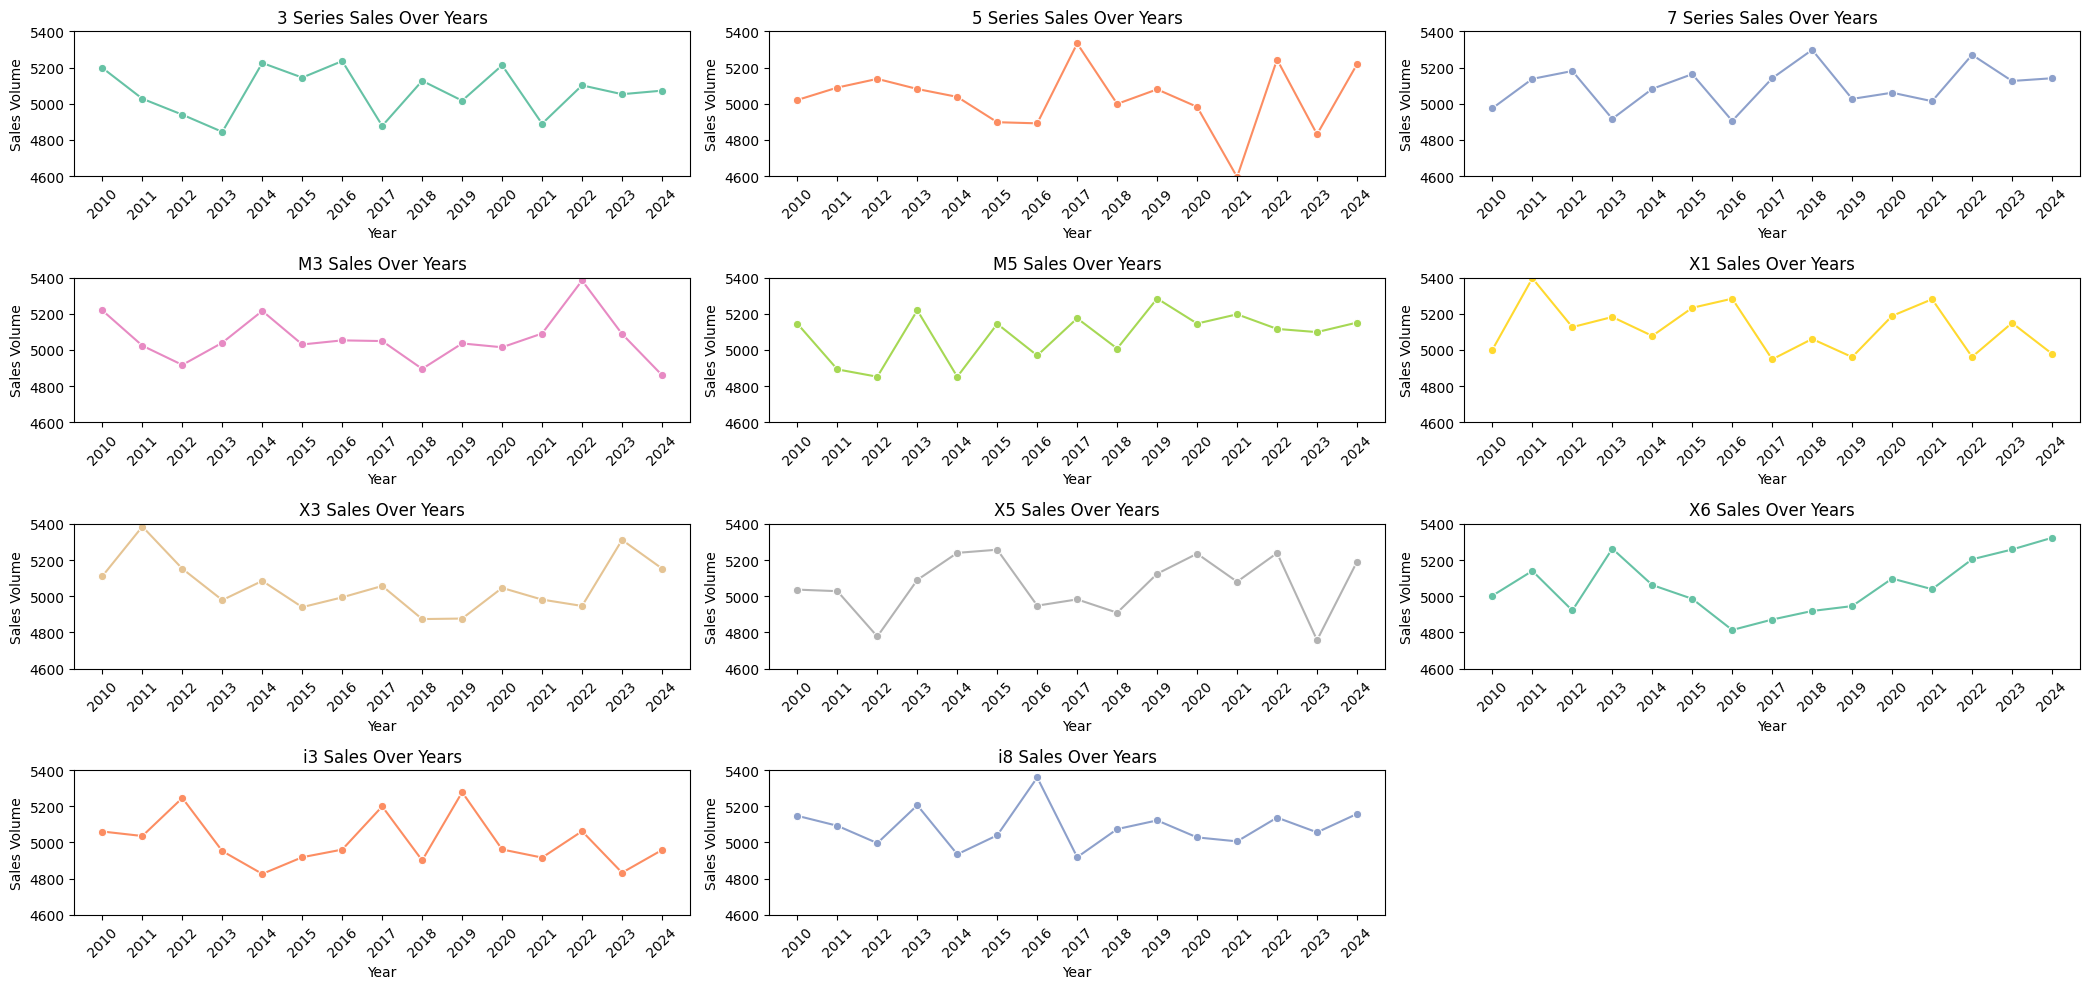

In [26]:
models = sorted(df['Model'].unique())
num_models = len(models)

fig, axs = plt.subplots(4, 3, figsize = (21,10))

axes = axs.flatten()

palette = sns.color_palette('Set2', n_colors=num_models)

for i, model in enumerate(models):
    ax = axes[i]
    model_data = df[df['Model'] == model]
    sns.lineplot(
        data=model_data,
        x='Year',
        y='Sales_Volume',
        ax=ax,
        color=palette[i],
        marker='o',
        errorbar=None
    )
    ax.set_title(f'{model} Sales Over Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales Volume')
    ax.set_xticks(sorted(df['Year'].unique()))
    ax.tick_params(axis='x', rotation=45)
    
    ax.set_ylim(4600,5400)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

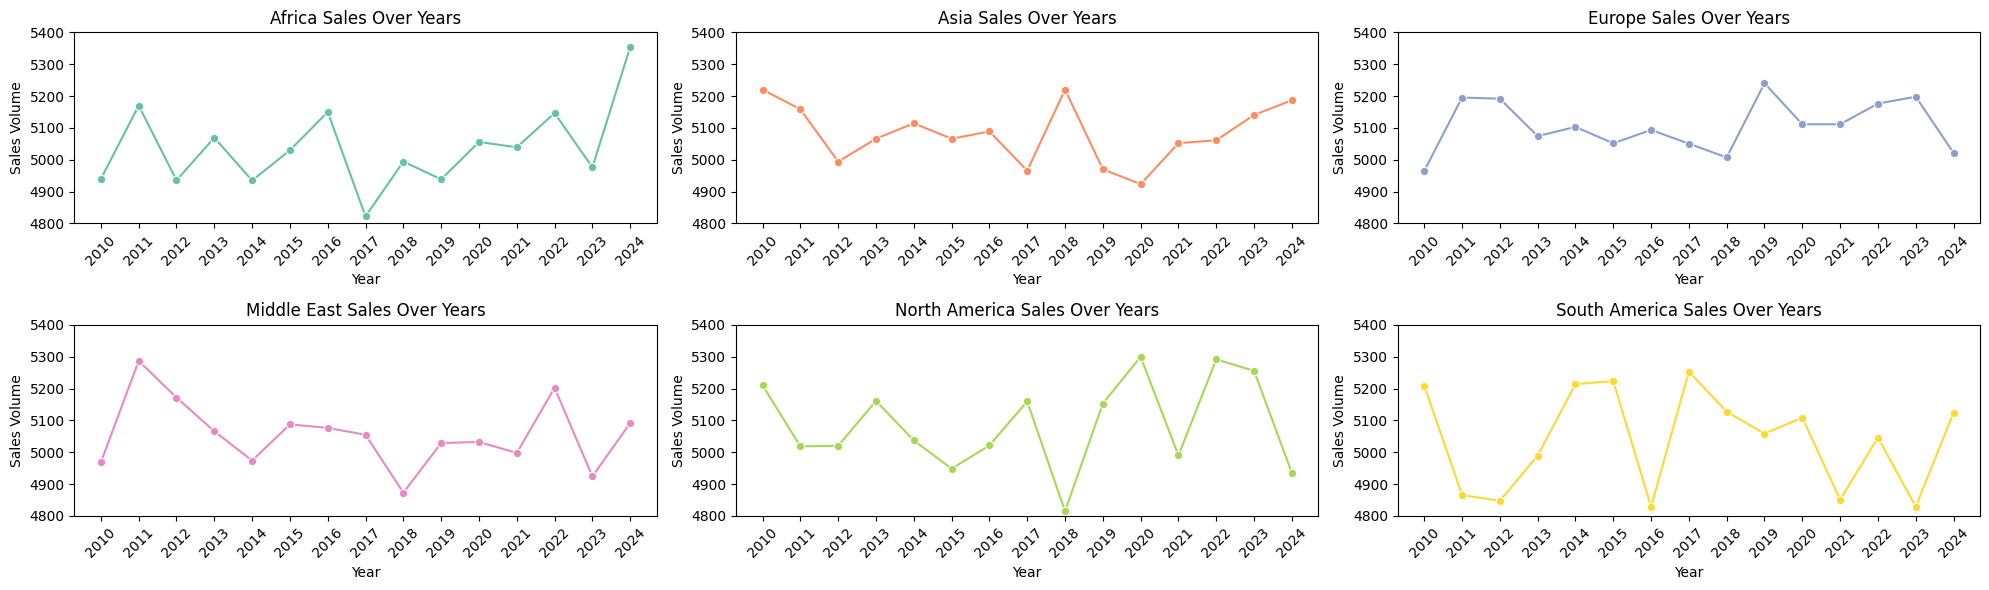

In [27]:
models = sorted(df['Region'].unique())
num_models = len(models)

fig, axs = plt.subplots(2, 3, figsize = (20,6))

axes = axs.flatten()

palette = sns.color_palette('Set2', n_colors=num_models)

for i, model in enumerate(models):
    ax = axes[i]
    model_data = df[df['Region'] == model]
    sns.lineplot(
        data=model_data,
        x='Year',
        y='Sales_Volume',
        ax=ax,
        color=palette[i],
        marker='o',
        errorbar=None
    )
    ax.set_title(f'{model} Sales Over Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales Volume')
    ax.set_xticks(sorted(df['Year'].unique()))
    ax.tick_params(axis='x', rotation=45)
    
    ax.set_ylim(4800,5400)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()